In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-101V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training for potentially many epochs, but with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=100,  # Train potentially for many epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Evaluation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Additional Evaluation (Accuracy)
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)



Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/100


375/375 [==============================] - 254s 429ms/step - loss: 1.9616 - accuracy: 0.4546 - val_loss: 4.2633 - val_accuracy: 0.1750
Epoch 2/100
375/375 [==============================] - 230s 614ms/step - loss: 0.5914 - accuracy: 0.8127 - val_loss: 1.1499 - val_accuracy: 0.6987
Epoch 3/100
375/375 [==============================] - 265s 706ms/step - loss: 0.3277 - accuracy: 0.8964 - val_loss: 0.4436 - val_accuracy: 0.8650
Epoch 4/100
375/375 [==============================] - 248s 662ms/step - loss: 0.2338 - accuracy: 0.9266 - val_loss: 0.4831 - val_accuracy: 0.8693
Epoch 5/100
375/375 [==============================] - 255s 678ms/step - loss: 0.1729 - accuracy: 0.9429 - val_loss: 0.4087 - val_accuracy: 0.8863
Epoch 6/100
375/375 [==============================] - 268s 714ms/step - loss: 0.1361 - accuracy: 0.9568 - val_loss: 0.2368 - val_accuracy: 0.9253
Epoch 7/100
375/375 [====

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.
Epoch 1/30
375/375 [==============================] - 60s 136ms/step - loss: 1.8380 - accuracy: 0.4868 - val_loss: 3.9452 - val_accuracy: 0.2173
Epoch 2/30
375/375 [==============================] - 51s 135ms/step - loss: 0.5096 - accuracy: 0.8394 - val_loss: 1.5049 - val_accuracy: 0.6533
Epoch 3/30
375/375 [==============================] - 50s 134ms/step - loss: 0.3082 - accuracy: 0.9007 - val_loss: 0.6582 - val_accuracy: 0.8353
Epoch 4/30
375/375 [==============================] - 51s 135ms/step - loss: 0.2161 - accuracy: 0.9303 - val_loss: 0.2784 - val_accuracy: 0.9147
Epoch 5/30
375/375 [==============================] - 51s 135ms/step - loss: 0.1729 - accuracy: 0.9436 - val_loss: 0.3764 - val_accuracy: 0.8850
Epoch 6/30
375/375 [==============================] - 51s 136ms/step - loss: 0.1309 - accuracy: 0.9566 - val_loss: 0.2457 - val_accuracy: 0.9283
Epoch 7/30
375/375 [=======================

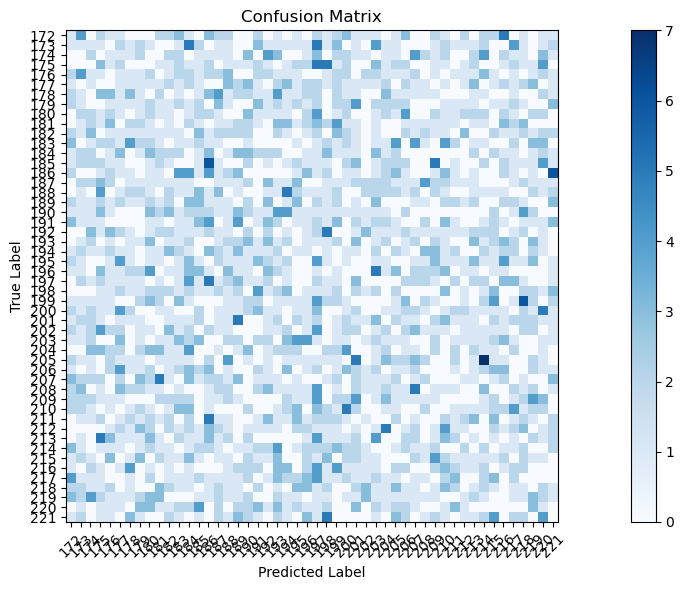

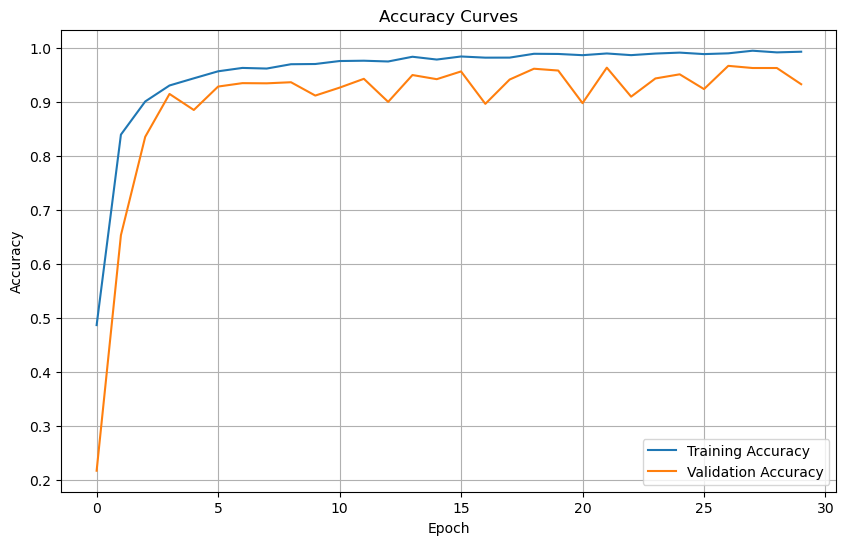

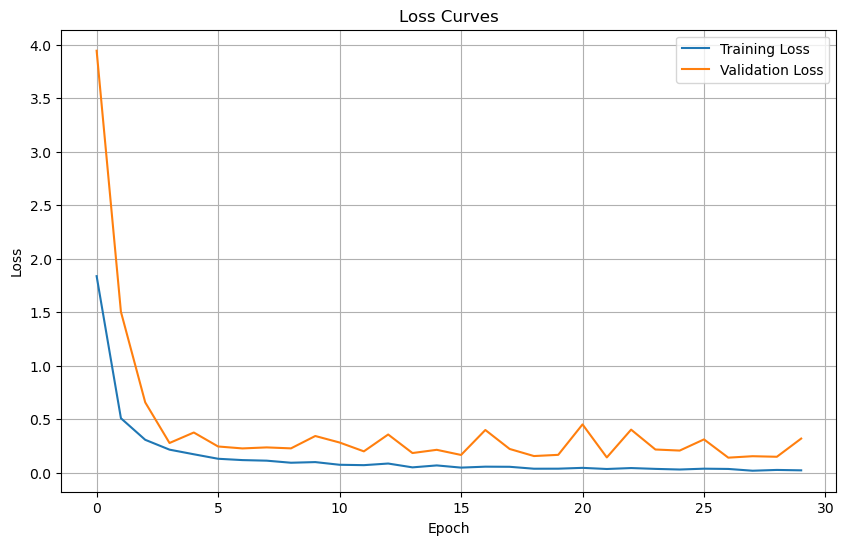

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-101V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=30,  # Set to 30 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size
)

# Evaluation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(15, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
